In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('C:\\Users\\lenovo\\Downloads\\Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.shape

(101, 18)

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type', ylabel='count'>

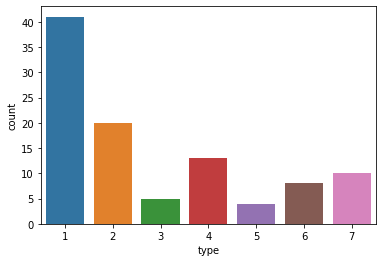

In [7]:
sns.countplot(data=data,x='type')

# Train test spilt

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x =data.iloc[:,1:17]
y=data['type']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

In [11]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
64,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [12]:
y_train

91    3
64    1
28    1
83    2
5     1
     ..
60    4
71    2
14    7
92    4
51    6
Name: type, Length: 70, dtype: int64

In [13]:
y_train.value_counts()

1    26
2    17
4    11
7     7
3     4
6     3
5     2
Name: type, dtype: int64

# Using KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = Knn.predict(x_test)

# Predictions

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,pred))

[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



# Choosing a K Value

In [21]:
error_rate = []

for i in range(1,21):
    
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x_train,y_train)
    pred_i = Knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rete')

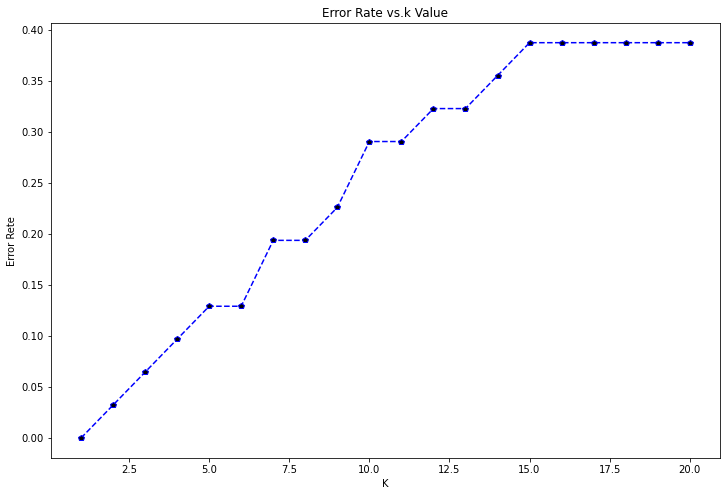

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(1,21),error_rate,color='blue',linestyle='dashed',marker='p',
        markerfacecolor='black',markersize=6)
plt.title('Error Rate vs.k Value')
plt.xlabel('K')
plt.ylabel('Error Rete')

In [23]:
Knn = KNeighborsClassifier(n_neighbors=6)

Knn.fit(x_train,y_train)
pred = Knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[14  0  0  1  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]


              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31

